SSD MODEL EĞİTİMİ

Kayan pencere kullanmak yerine görüntüyü ızgaralara bölerek her ızgaradaki nesneyi tespit etmeye çalışıyor

confides = bir nesnenin orda olma olasılığı

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [1]:
#Görüntüyü okuma
import matplotlib.pyplot as plt
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
#ALgılanan nesnelerin etiketleri
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]

In [4]:
# Verileri çeker
path = os.path.join(os.getcwd(), "image")
files = os.listdir(path)

# print(files)
img_path_list = []
for f in files:
    if f.endswith(".jpg"):
        img_path_list.append(path+"/"+f)

In [5]:
COLORS = np.random.uniform(0,255, size=(len(CLASSES),3)) #her bir bulunan nesne için farklı renkler atıyoru

#Deep Neural Network 
# Modeli yüklemek için kullanılır
net = cv2.dnn.readNetFromCaffe(os.path.join(os.getcwd(), "MobileNetSSD_deploy.prototxt.txt"),os.path.join(os.getcwd(), "MobileNetSSD_deploy.caffemodel"))


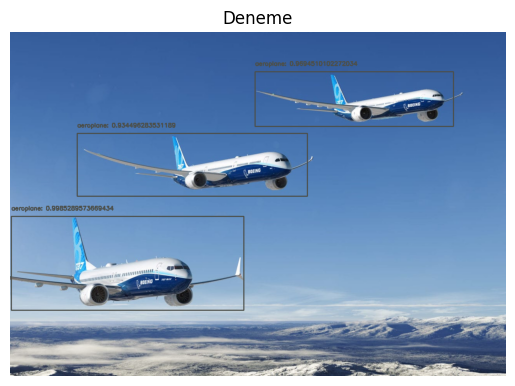

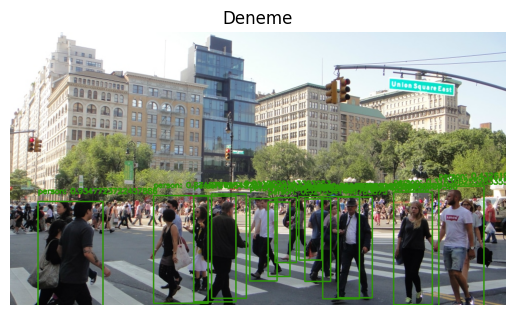

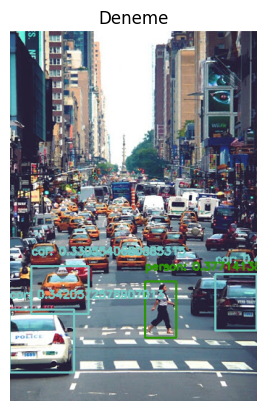

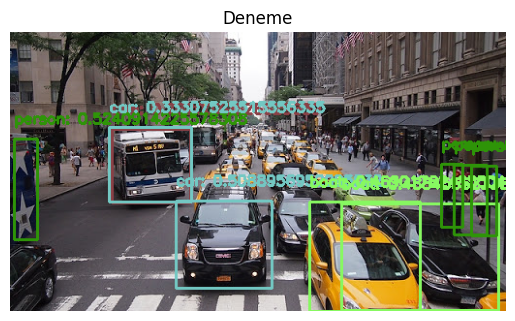

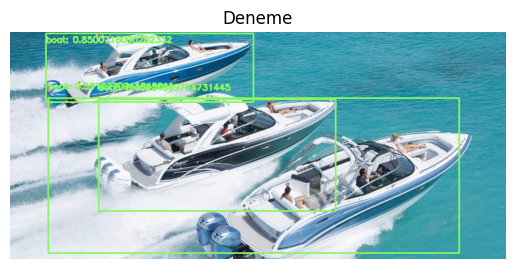

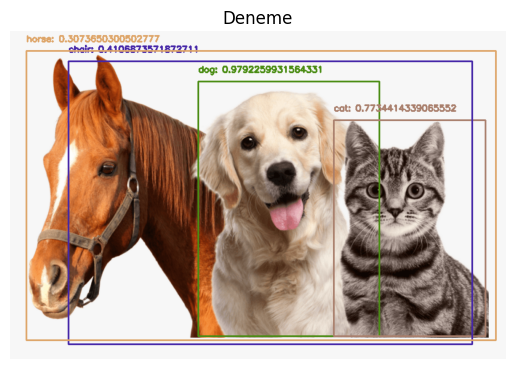

In [23]:
for i in img_path_list:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    (h, w) = image.shape[:2]

    # Görüntüleri modele uygun formata getirmek için kullanılır
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), scalefactor=0.007843, size=(300, 300), mean=127.5)
    # scalefactor = girdiyi ölçeklendirmek için kullanılır. Piksel değerini belli bir araya getirir. Yani Normalizasyon uygular.
    # size = girdinin boyutunu belirler
    # mean = girdinin ortalamasını belirler

    net.setInput(blob) #girdi alır
    detections = net.forward() # ileriye doğru hesaplama yapar. Yani modeli çalıştırır.

    for j in np.arange(0, detections.shape[2]):

        confidence = detections[0,0,j,2] # Güven puanını alır

        if confidence > 0.3: #Belli seviyenin üstündeyse nesneyi çizdirir

            idx = int(detections[0,0,j,1]) # Nesnenin sınıfını alır
            box = detections[0,0,j,3:7] * np.array([w,h,w,h]) # Nesnenin koordinatlarını alır
            (startX, startY, endX, endY) = box.astype("int")# Koordinatları integera çevirir

            label = "{}: {}".format(CLASSES[idx], confidence) # Nesnenin sınıfını ve güven puanını yazdırır
            cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2) # Nesnenin etrafına dikdörtgen çizer
            y = startY - 16 if startY - 16 > 15 else startY + 16 # Nesnenin etrafına yazı yazar
            cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx],2)
    display_image(image, "Deneme")
    if cv2.waitKey(0) & 0xFF == ord("q"):break

cv2.destroyAllWindows()









SSD VİDEO model

In [6]:
vc = cv2.VideoCapture(0)
vc.set(3,800)
vc.set(4,600)

while True:
    succes,image = vc.read()
    image = cv2.flip(image,1)

    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    net.setInput(blob)
    detections = net.forward()

    for j in np.arange(0, detections.shape[2]):

        confidence = detections[0,0,j,2]

        if confidence > 0.3:

            idx = int(detections[0,0,j,1])
            box = detections[0,0,j,3:7] * np.array([w,h,w,h])
            (startX, startY, endX, endY) = box.astype("int")

            label = "{}: {}".format(CLASSES[idx], confidence)
            cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2)
            
            y = startY - 16 if startY - 16 > 15 else startY + 16
            cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx],2)

    cv2.imshow("ssd", image)
    if cv2.waitKey(1) & 0xFF == ord("q"):break

vc.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 